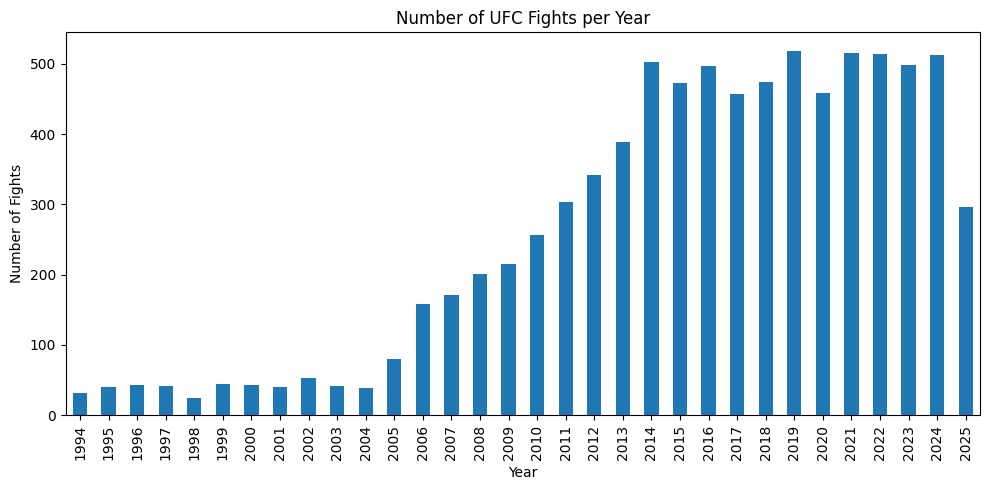

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your classified fights CSV
df = pd.read_csv("../build/fights_classified.csv")

# Example 1: Count of fights per year
df['DATE'] = pd.to_datetime(df['DATE'])
df['year'] = df['DATE'].dt.year
fights_per_year = df.groupby('year').size()

plt.figure(figsize=(10,5))
fights_per_year.plot(kind='bar')
plt.title('Number of UFC Fights per Year')
plt.xlabel('Year')
plt.ylabel('Number of Fights')
plt.tight_layout()
plt.show()

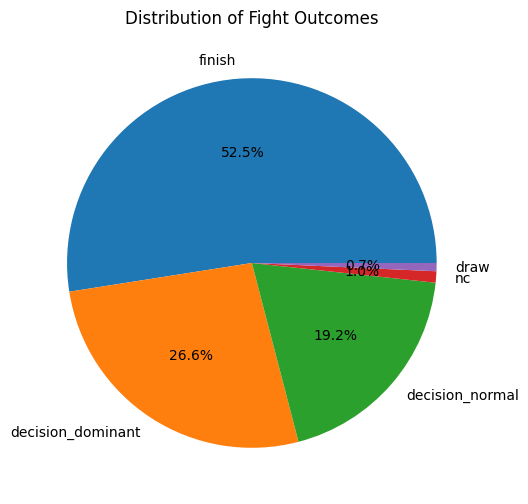

In [3]:
# Example 2: Distribution of method_class
df['method_class'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(6,6))
plt.title('Distribution of Fight Outcomes')
plt.ylabel('')
plt.show()

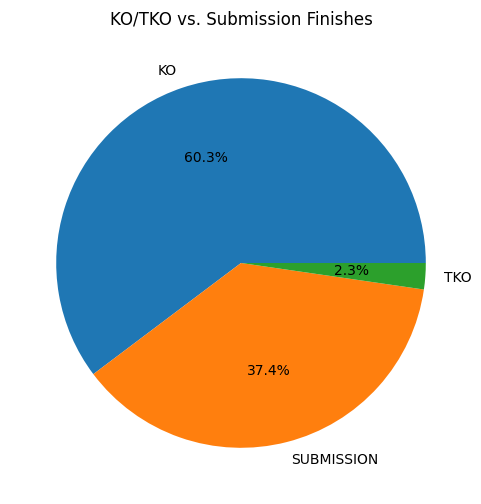

In [4]:
# Only look at finishes
finishes = df[df['METHOD'].str.contains('KO|TKO|Submission', case=False, na=False)]
finish_types = finishes['METHOD'].str.extract('(KO|TKO|Submission)', expand=False).str.upper().value_counts()

finish_types.plot(kind='pie', autopct='%1.1f%%', figsize=(6,6))
plt.title('KO/TKO vs. Submission Finishes')
plt.ylabel('')
plt.show()

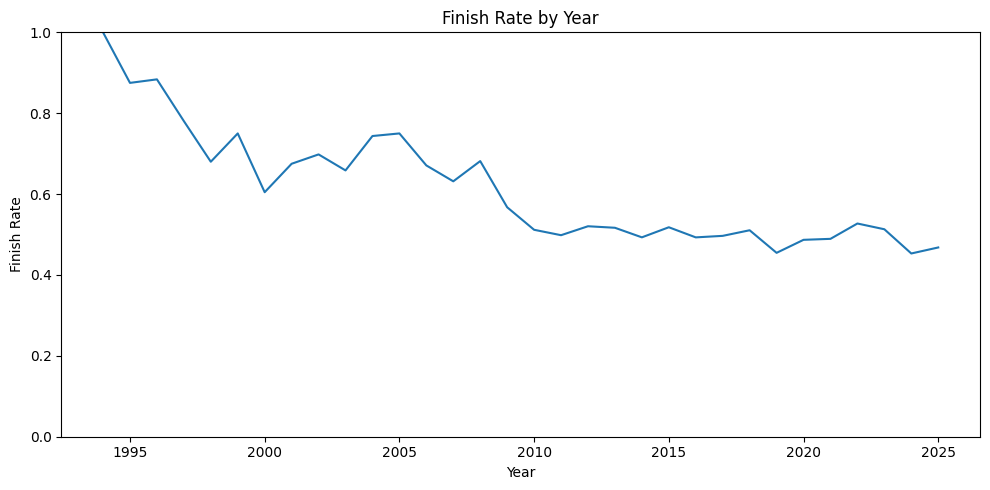

In [5]:
finish_rate = df.groupby('year')['method_class'].apply(lambda x: (x == 'finish').mean())

plt.figure(figsize=(10,5))
finish_rate.plot()
plt.title('Finish Rate by Year')
plt.xlabel('Year')
plt.ylabel('Finish Rate')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

/var/folders/bd/4xzyvv6x76g916r0mhtk5lbh0000gn/T/ipykernel_12772/1947993654.py:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


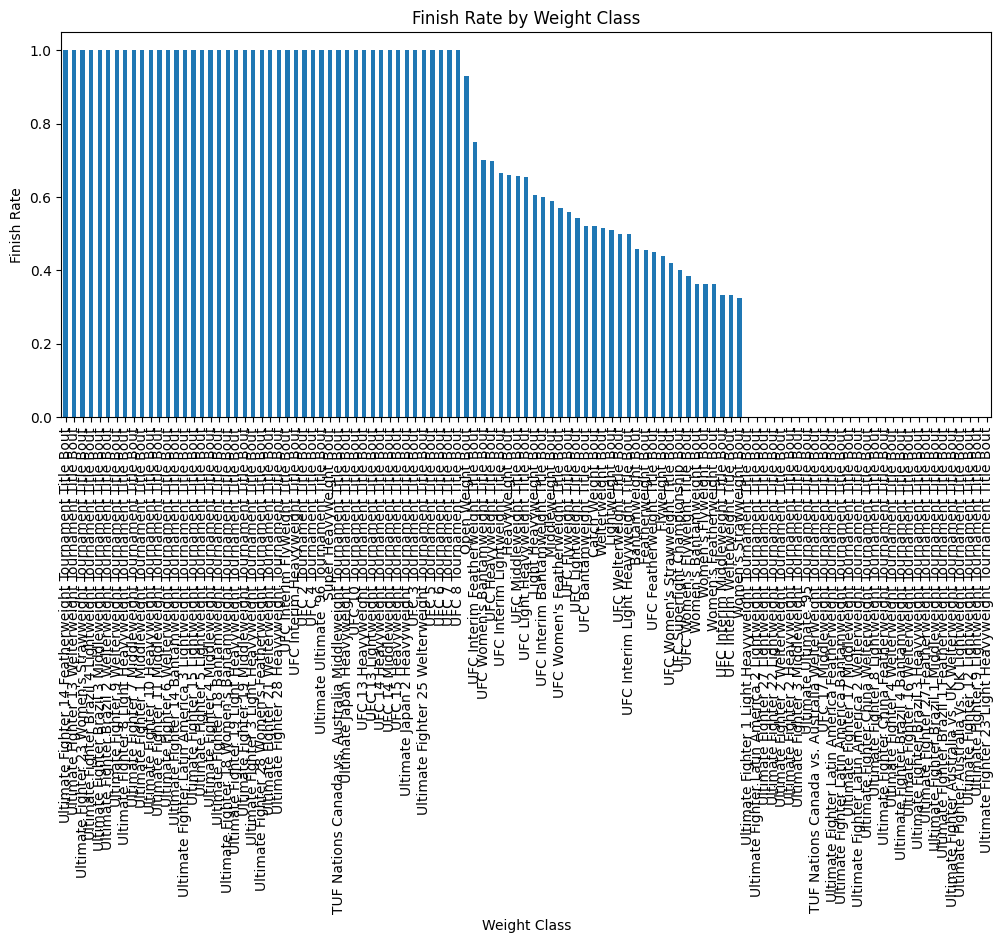

In [6]:
# Define a finish as KO/TKO/Submission
# Create a finish column
df['is_finish'] = df['METHOD'].str.contains('KO|TKO|Submission', case=False, na=False)

# Then group by weight class and calculate mean
finish_rate = df.groupby('WEIGHTCLASS')['is_finish'].mean().sort_values(ascending=False)

finish_rate.plot(kind='bar', figsize=(12,5))
plt.title('Finish Rate by Weight Class')
plt.xlabel('Weight Class')
plt.ylabel('Finish Rate')
plt.tight_layout()
plt.show()